<h1>COURSERA CAPSTONE PROJECT :</h1>
<h2>Clustering Neighbourhoods of Greater Manchester :</h2>

<h3>Importing the required libraries</h3>

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import csv

<h3>Setting maxcolwidth to 800 for good viewability</h3>

In [3]:
pd.set_option('max_colwidth', 800)

<h3>Getting the source webpage , assigining the variable source to it , iniatilizing the beautifulsoup object to soup and finding the retrieving the data</h3>

In [4]:
from bs4 import BeautifulSoup 
import requests

source = requests.get('https://en.wikipedia.org/wiki/Category:Areas_of_Greater_Manchester').text
soup = BeautifulSoup(source, 'lxml')
dummy = soup.find_all(class_='mw-category-group')
man = []
for i in range(len(dummy)):
    lists = dummy[i].find_all('a')
    for list in lists:
        temp = list.get('title')
        man.append(temp)

man

for i in range(len(man)):
    if i<=20:
        man.remove(man[i])

print(man)

['Category:Areas of Bolton', 'Category:Areas of Manchester', 'Category:Areas of the Metropolitan Borough of Rochdale', 'Category:Areas of Stockport', 'Agecroft', 'Ashton upon Mersey', "Besses o' th' Barn", 'Boothstown', 'Bradshaw, Greater Manchester', 'Brandlesholme', 'Bromley Cross', 'Carrbrook', 'Copley, Greater Manchester', 'Davyhulme', 'Firswood', 'Flixton, Greater Manchester', 'Gatley', 'Godley, Greater Manchester', 'Hattersley', 'High Crompton', 'Hindsford', 'Houldsworth Model Village', 'Howe Bridge', 'Ladybrook Valley', 'Langley, Greater Manchester', 'Longshaw', 'Makerfield', 'Matley', 'Middlebrook, Greater Manchester', 'Monton', 'Moses Gate', 'Mosley Common', 'Norbury, Greater Manchester', 'North Reddish', 'Old Trafford (area)', 'Orrell, Greater Manchester', 'Patricroft', 'Peel Green', 'Pennington, Greater Manchester', 'Pilsworth', 'Reddish', 'Redvales', 'Romiley', 'Rumworth', 'Rusholme', 'Salford Quays', 'Sedgley Park', 'Shakerley', 'South Reddish', 'South Turton', 'Tonge, Mid

In [5]:
man.remove('Category:Areas of Bolton')
man.remove('Category:Areas of Manchester')
man.remove('Category:Areas of the Metropolitan Borough of Rochdale')
man.remove('Category:Areas of Stockport')
man

['Agecroft',
 'Ashton upon Mersey',
 "Besses o' th' Barn",
 'Boothstown',
 'Bradshaw, Greater Manchester',
 'Brandlesholme',
 'Bromley Cross',
 'Carrbrook',
 'Copley, Greater Manchester',
 'Davyhulme',
 'Firswood',
 'Flixton, Greater Manchester',
 'Gatley',
 'Godley, Greater Manchester',
 'Hattersley',
 'High Crompton',
 'Hindsford',
 'Houldsworth Model Village',
 'Howe Bridge',
 'Ladybrook Valley',
 'Langley, Greater Manchester',
 'Longshaw',
 'Makerfield',
 'Matley',
 'Middlebrook, Greater Manchester',
 'Monton',
 'Moses Gate',
 'Mosley Common',
 'Norbury, Greater Manchester',
 'North Reddish',
 'Old Trafford (area)',
 'Orrell, Greater Manchester',
 'Patricroft',
 'Peel Green',
 'Pennington, Greater Manchester',
 'Pilsworth',
 'Reddish',
 'Redvales',
 'Romiley',
 'Rumworth',
 'Rusholme',
 'Salford Quays',
 'Sedgley Park',
 'Shakerley',
 'South Reddish',
 'South Turton',
 'Tonge, Middleton',
 'Torkington',
 'Trafford Park',
 'Unsworth',
 'Urmston',
 'Wallsuches',
 'Walmersley',
 'Warb

<h3>Naming the column of data</h3>

In [6]:
df = pd.DataFrame()
df['Area Of Manchester'] = man
df

,Area Of Manchester
0,Agecroft
1,Ashton upon Mersey
2,Besses o' th' Barn
3,Boothstown
4,"Bradshaw, Greater Manchester"
5,Brandlesholme
6,Bromley Cross
7,Carrbrook
8,"Copley, Greater Manchester"
9,Davyhulme


<h3>Finding out the shape :</h3>

In [7]:
print("The shape is : " + str(df.shape))

The shape is : (56, 1)


In [8]:
pip install opencage

Note: you may need to restart the kernel to use updated packages.


<h3>Importing the OpenCageGeocode api dependencies : to retrieve the latitude and longitude from the location name</h3>

In [9]:
from opencage.geocoder import OpenCageGeocode
from pprint import pprint

In [10]:
key = 'ac2a83debe8745ac945cf623945274fb'
geocoder = OpenCageGeocode(key)

In [11]:
enco = ' , Greater Manchester'

lat = []
lon = []

for name in df['Area Of Manchester']:
    query = str(name) + enco
    result = geocoder.geocode(query)
    lat.append(result[0]['geometry']['lat'])
    lon.append(result[0]['geometry']['lng'])

df['Latitudes'] = lat
df['Longitudes'] = lon

In [30]:
df.rename(columns={'Area Of Manchester' : 'Neighborhoods' , 'Latitudes' : 'Latitude' , 'Longitudes' : 'Longitude'} , inplace=True)
df

,Neighborhoods,Latitude,Longitude
0,Agecroft,53.505212,-2.299912
1,Ashton upon Mersey,53.429835,-2.343177
2,Besses o' th' Barn,53.541943,-2.286099
3,Boothstown,53.500480,-2.431061
4,"Bradshaw, Greater Manchester",53.606603,-2.398959
5,Brandlesholme,53.607406,-2.312156
6,Bromley Cross,53.617096,-2.414815
7,Carrbrook,53.505455,-2.020720
8,"Copley, Greater Manchester",53.486281,-2.041404
9,Davyhulme,53.454608,-2.367735


<h3>Importing dependencies of ploting</h3>

In [14]:
# Downloading folium, if not installed
!conda install -c conda-forge folium=0.5.0 --yes
import folium # Map plotting library
import numpy as np
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

print("Dependencies installed !")

Solving environment: ...working... done

# All requested packages already installed.

Dependencies installed !


<h3>Plotting a map using Folium of Greater Manchester Area</h3>

In [32]:
gman_lat = 53.4576
gman_lng = -2.1578

# Creates map of Greater Manchester using latitude and longitude values
map_man = folium.Map(location=[gman_lat, gman_lng], zoom_start=10)

# Add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhoods']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_man)  
    
map_man

<h3>API Retreving stuff:</h3>

In [33]:
CLIENT_ID = 'XEIY3JJQY0QPPPG2MDYWUF11EPSEOHRZJBCJCCIFVJYBZ10O'
CLIENT_SECRET = 'LIANY3ONJGEYMTTUHOQSOS2S33Q4K4VABZPEYAMU2YDLR301'
VERSION = '20200415'

<h3>Defining own function to get the name of the category</h3>

In [34]:
def get_category_type(row):
    
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

<h3>Finding out the number of collisions if any</h3>

In [36]:
col = 0
explored_lat_lng = []
for lat, lng, neighbourhood in zip(df['Latitude'], df['Longitude'], df['Neighborhoods']):
    if (lat, lng) in explored_lat_lng:
        col = col + 1
    else:
        explored_lat_lng.append((lat, lng))

print("Collisions : ", col)

Collisions :  2


In [55]:
import json

<h3>Using the FourSquare API on all neighbourhoods</h3>

In [60]:
explore_df_list = []

for i, nbd_name in enumerate(df['Neighborhoods']):  
    try :
        ### Getting the data of neighbourhood
        nbd_name = df.loc[i, 'Neighborhoods']
        nbd_lat = df.loc[i, 'Latitude']
        nbd_lng = df.loc[i, 'Longitude']

        radius = 1000 # Setting the radius as 1000 metres
        LIMIT = 30 # Getting the top 30 venues

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nbd_lat, nbd_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flattens JSON
        
         # Filtering the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Renaming the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Gets the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Gets the data required
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nbd_name, nbd_lat, nbd_lng] + s_list
            explore_df_list.append(f_list)

    except Exception as e:
        pass

<h3>Creating a dataframe for performing clustering operations</h3>

In [61]:
explore_df = pd.DataFrame([item for item in explore_df_list])
explore_df.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_df

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,Ashton upon Mersey,53.429835,-2.343177,Co-op Food,Grocery Store,53.429356,-2.342149
1,Ashton upon Mersey,53.429835,-2.343177,Premier Inn Manchester (Sale),Hotel,53.430667,-2.355654
2,Ashton upon Mersey,53.429835,-2.343177,Tesco Express,Grocery Store,53.429710,-2.341886
3,Ashton upon Mersey,53.429835,-2.343177,Ashton Park,Park,53.430501,-2.337300
4,Ashton upon Mersey,53.429835,-2.343177,Mersey Farm Table Table,Pub,53.430561,-2.356440
5,Ashton upon Mersey,53.429835,-2.343177,Nisa Local,Convenience Store,53.426805,-2.353070
6,Ashton upon Mersey,53.429835,-2.343177,The Eskdale Lodge,Pub,53.422332,-2.338555
7,Besses o' th' Barn,53.541943,-2.286099,M&S Simply Food,Grocery Store,53.533979,-2.285605
8,Besses o' th' Barn,53.541943,-2.286099,Slattery,Bakery,53.548292,-2.294040
9,Besses o' th' Barn,53.541943,-2.286099,Armstrong's Fish & Chips,Seafood Restaurant,53.537656,-2.276417


<h3>Performing one-hot encoding to analyze Neighbourhoods</h3>

In [63]:
# One hot encoding
man_onehot = pd.get_dummies(explore_df[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
man_onehot['Neighbourhood'] = explore_df['Neighbourhood'] 

# Move neighborhood column to the first column
fixed_columns = [man_onehot.columns[-1]] + man_onehot.columns[:-1].values.tolist()
man_onehot = man_onehot[fixed_columns]

man_onehot

,Neighbourhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Athletics & Sports,Bakery,Bar,Bed & Breakfast,Beer Bar,Bowling Alley,...,Supermarket,Tea Room,Tennis Stadium,Theater,Theme Park,Theme Restaurant,Trail,Train Station,Tram Station,Turkish Restaurant
0,Ashton upon Mersey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ashton upon Mersey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ashton upon Mersey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ashton upon Mersey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ashton upon Mersey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Ashton upon Mersey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Ashton upon Mersey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Besses o' th' Barn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Besses o' th' Barn,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Besses o' th' Barn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3>Aggregating venues by Neighbourhoods</h3>

In [64]:
man_grouped = man_onehot.groupby('Neighbourhood').mean().reset_index()
man_grouped.head()

,Neighbourhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Athletics & Sports,Bakery,Bar,Bed & Breakfast,Beer Bar,Bowling Alley,...,Supermarket,Tea Room,Tennis Stadium,Theater,Theme Park,Theme Restaurant,Trail,Train Station,Tram Station,Turkish Restaurant
0,Ashton upon Mersey,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Besses o' th' Barn,0.0,0.058824,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,...,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Boothstown,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Bradshaw, Greater Manchester",0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Brandlesholme,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3>Creating a function to return the most common venues</h3>

In [65]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

<h3>Creating a new dataframe to get the top 10 venues</h3>

In [67]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = man_grouped['Neighbourhood']

for ind in np.arange(man_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(man_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ashton upon Mersey,Grocery Store,Pub,Convenience Store,Hotel,Park,Turkish Restaurant,Fish & Chips Shop,Film Studio,Fast Food Restaurant,Farm
1,Besses o' th' Barn,Coffee Shop,Grocery Store,Fast Food Restaurant,Soccer Stadium,American Restaurant,Seafood Restaurant,Bakery,Pharmacy,Pizza Place,Supermarket
2,Boothstown,Indian Restaurant,Flower Shop,Gas Station,Pub,Farm,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant,Turkish Restaurant
3,"Bradshaw, Greater Manchester",Supermarket,Home Service,Gastropub,Pub,Chinese Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Entertainment Service,Food Truck
4,Brandlesholme,Grocery Store,Park,Campground,Bus Stop,Pub,Gas Station,Farm,Fish & Chips Shop,Film Studio,Fast Food Restaurant


In [68]:
man_grouped_clustering = man_grouped.drop('Neighbourhood', 1)

<h3>Using K-Means clustering</h3>

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [70]:
max_range = 20 # Maximum range of clusters

In [71]:
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kgc = man_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kgc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kgc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

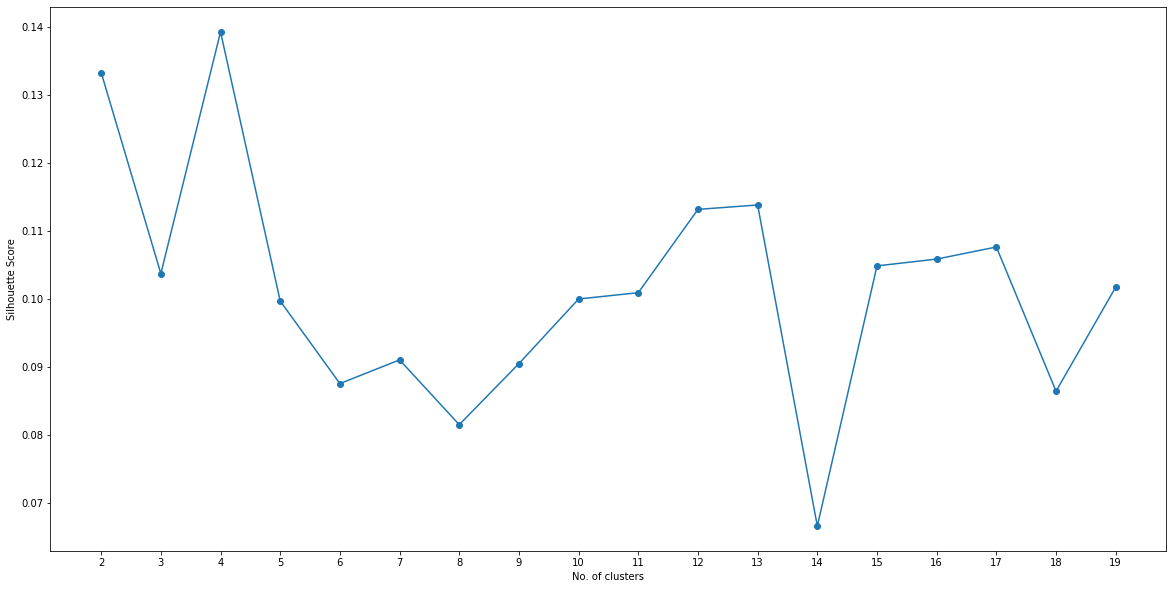

In [72]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

<h3>From the graph the optimal number is found out to be considered for our clustering</h3>

In [73]:
opt = np.argmax(scores) + 2 # Finds the optimal value
opt

4

<h3>K-Means clustering for the optimal number of clusters</h3>

In [74]:
kclusters = opt

# Run k-means clustering
kgc = man_grouped_clustering
kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit(kgc)

In [75]:
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

<h3>Creating the Final dataframe containing the necessary data</h3>

In [109]:
man_merged = df
man_merged = man_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighborhoods')
man_merged.dropna(inplace = True)
man_merged['Cluster Labels'] = man_merged['Cluster Labels'].astype(int)
man_merged

,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Ashton upon Mersey,53.429835,-2.343177,1,Grocery Store,Pub,Convenience Store,Hotel,Park,Turkish Restaurant,Fish & Chips Shop,Film Studio,Fast Food Restaurant,Farm
2,Besses o' th' Barn,53.541943,-2.286099,1,Coffee Shop,Grocery Store,Fast Food Restaurant,Soccer Stadium,American Restaurant,Seafood Restaurant,Bakery,Pharmacy,Pizza Place,Supermarket
3,Boothstown,53.500480,-2.431061,1,Indian Restaurant,Flower Shop,Gas Station,Pub,Farm,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant,Turkish Restaurant
4,"Bradshaw, Greater Manchester",53.606603,-2.398959,3,Supermarket,Home Service,Gastropub,Pub,Chinese Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Entertainment Service,Food Truck
5,Brandlesholme,53.607406,-2.312156,1,Grocery Store,Park,Campground,Bus Stop,Pub,Gas Station,Farm,Fish & Chips Shop,Film Studio,Fast Food Restaurant
6,Bromley Cross,53.617096,-2.414815,1,Grocery Store,Breakfast Spot,Train Station,Sandwich Place,Hotel,Turkish Restaurant,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant
7,Carrbrook,53.505455,-2.020720,1,Golf Course,Home Service,Ethiopian Restaurant,Convenience Store,Farm,Flower Shop,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant
8,"Copley, Greater Manchester",53.486281,-2.041404,1,Pub,Gym Pool,Pool,Business Service,Park,Falafel Restaurant,Fish & Chips Shop,Film Studio,Fast Food Restaurant,Farm
9,Davyhulme,53.454608,-2.367735,1,Italian Restaurant,Park,Pub,Soccer Field,Train Station,Gym,Playground,Bar,Fish & Chips Shop,Film Studio
10,Firswood,53.451166,-2.277609,1,Bar,Pub,Tram Station,Café,Cricket Ground,Turkish Restaurant,Pharmacy,Deli / Bodega,Pizza Place,Grocery Store


<h2>Visualizing the Clusters</h2>

In [99]:
# Create map
map_clusters = folium.Map(location=[gman_lat, gman_lng], zoom_start=11)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(man_merged['Latitude'], man_merged['Longitude'], man_merged['Neighborhoods'], man_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

In [134]:
val = 1
man_merged.loc[man_merged['Cluster Labels'] == (val - 1), man_merged.columns[[0] + np.arange(4, man_merged.shape[1]).tolist()]]

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Hindsford,Supermarket,Bar,Roller Rink,Fast Food Restaurant,Soccer Field,Ethiopian Restaurant,Entertainment Service,Event Space,Falafel Restaurant,Fried Chicken Joint
34,"Pennington, Greater Manchester",Supermarket,Gym,Movie Theater,Chinese Restaurant,Portuguese Restaurant,Hotel,Sports Club,Stadium,Gastropub,Playground
35,Pilsworth,Supermarket,Gas Station,Hotel,Turkish Restaurant,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant,Farm,Falafel Restaurant
43,Shakerley,Supermarket,Pub,Train Station,Fast Food Restaurant,Fish Market,Fish & Chips Shop,Film Studio,Farm,Falafel Restaurant,Turkish Restaurant
